In [1]:
# Разработать байесовский классификатор для данных Титаник (Titanic dataset) -
# https://www.kaggle.com/c/titanic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder

DS = pd.read_csv('train.csv')

DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
myImputer = SimpleImputer (strategy= 'median')
DS.Age = myImputer.fit_transform(DS['Age'].values.reshape(-1,1))
myImputer = SimpleImputer (strategy= 'most_frequent')
DS.Embarked = myImputer.fit_transform(DS['Embarked'].values.reshape(-1,1))

In [4]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


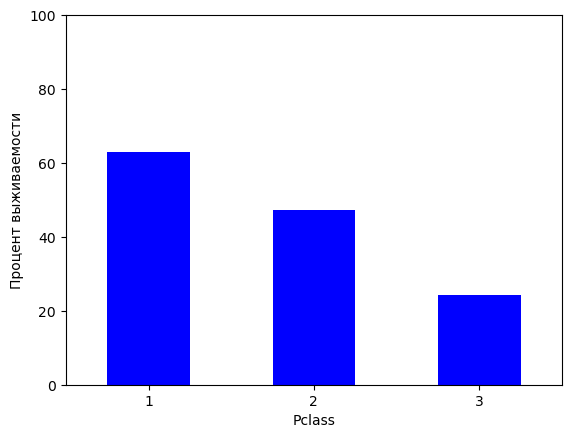

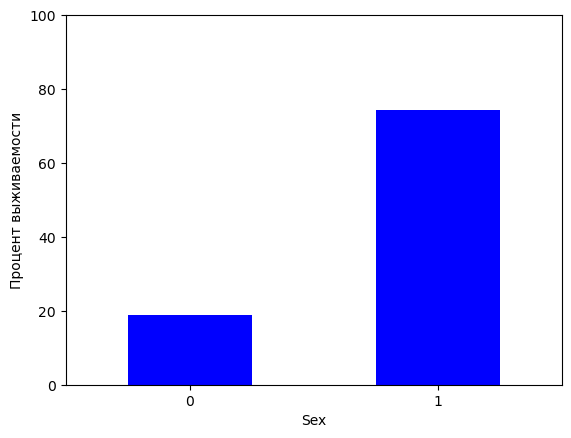

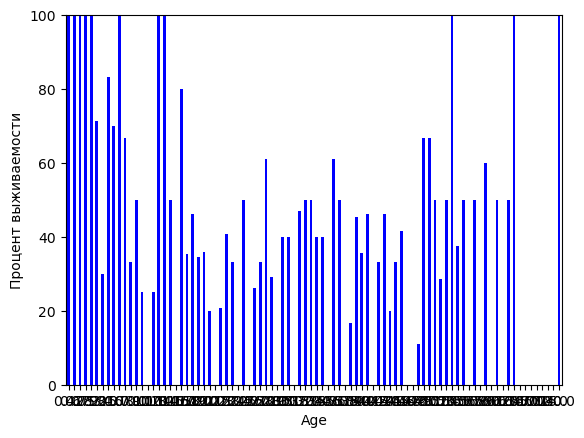

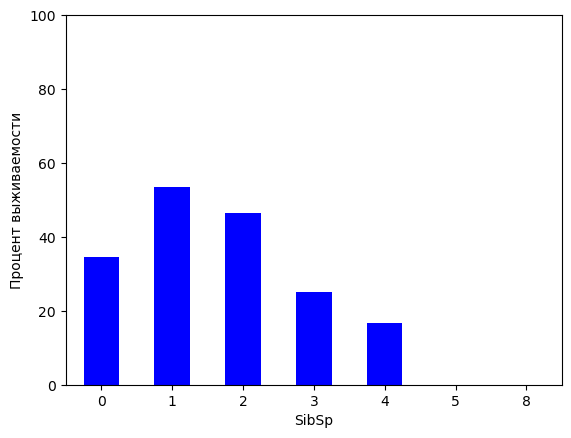

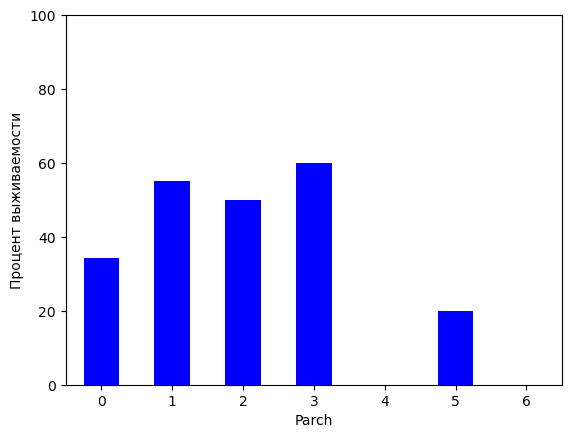

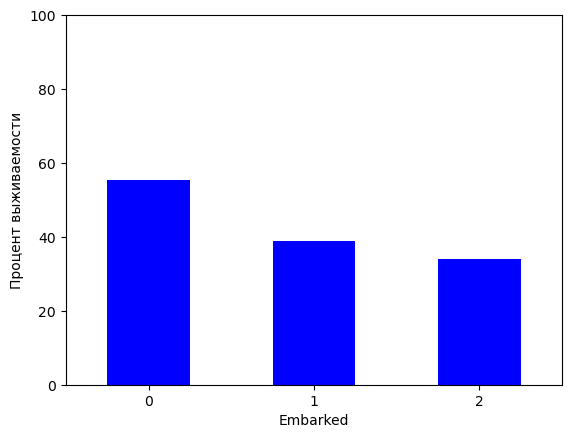

In [8]:
# Рассчитываем процент выживаемости для каждого параметра
survival_percentages = {}
for column in DS.columns:
    if column not in ['Survived', 'Name', 'PassengerId', 'Ticket', 'Fare', 'Cabin'] :
        survival_percentages[column] = DS.groupby(column)['Survived'].mean() * 100

# Создание графиков
for parameter, percentages in survival_percentages.items():
    plt.figure()
    percentages.plot(kind='bar', color='blue')
    plt.xlabel(parameter)
    plt.ylabel('Процент выживаемости')
    plt.ylim([0, 100])
    plt.xticks(rotation=0)
    plt.show()

In [6]:
# Преобразуем символы и строки в числа в DS
s = {'male':0,'female':1}
DS['Sex'] = DS['Sex'].apply(lambda x:s[x])
e = {'C':0,'Q':1,'S':2}
DS['Embarked'] = DS['Embarked'].apply(lambda x:e[x])


# Рассмотрим точноть для разных столбцов
colum_target = ['Survived']
colum_param_0 = ['Pclass','Sex','Age']
colum_param_1 = ['Pclass','Sex','Age','SibSp']
colum_param_2 = ['Pclass','Sex','Age','SibSp','Parch']
colum_param_3 = ['Pclass','Sex','Age','SibSp','Embarked']
colum_param_4 = ['Pclass','Sex','Age','Parch']
colum_param_5 = ['Pclass','Sex','Age','Parch','Embarked']
colum_param_6 = ['Pclass','Sex','Age','Embarked']
colum_param_7 = ['Pclass','Sex','Age','SibSp','Parch','Embarked']


C_P = [colum_param_0, colum_param_1, colum_param_2, colum_param_3, colum_param_4, colum_param_5, colum_param_6, colum_param_7]

y = DS[colum_target]

# Создание списка для хранения результатов
results = []


for P in C_P:
    X = DS[P]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
    # Создание и обучение модели
    nbais = GaussianNB()
    nbais.fit(X_train, y_train)
    
    # Прогнозирование
    nbais.predict(X_test)
    
    # Оценка качества классификации
    accuracy = nbais.score(X_test,y_test)
    
    results.append((P, accuracy))

# Вывод точности
for i in results:
    print (i)


(['Pclass', 'Sex', 'Age'], 0.7541899441340782)
(['Pclass', 'Sex', 'Age', 'SibSp'], 0.7653631284916201)
(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], 0.7597765363128491)
(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], 0.7597765363128491)
(['Pclass', 'Sex', 'Age', 'Parch'], 0.7486033519553073)
(['Pclass', 'Sex', 'Age', 'Parch', 'Embarked'], 0.7653631284916201)
(['Pclass', 'Sex', 'Age', 'Embarked'], 0.7653631284916201)
(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], 0.770949720670391)


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,